<a href="https://colab.research.google.com/github/hache22/TITANIC-Arbol_de_Decision/blob/main/Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRIPT EN PYTHON DE ARBOL DE DECISION
El mismo analiza si una persona que no estuvo dentro del titanic es capaz de sobrevivir o morir.
Analiza los datos del set de datos creado a partir de los datos de las personas que estuvieron dentro del Titanic.

Importacion de los datos junto con las librerias

In [2]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [3]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

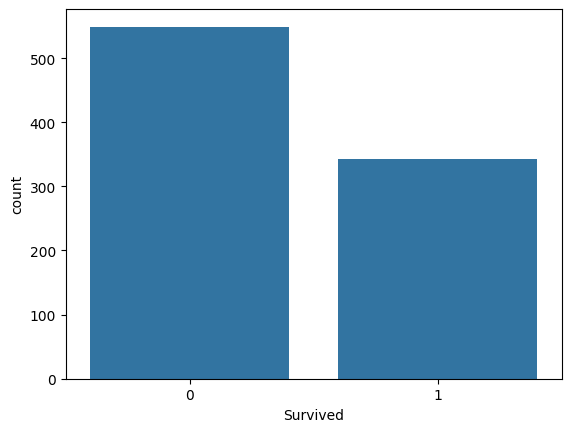

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

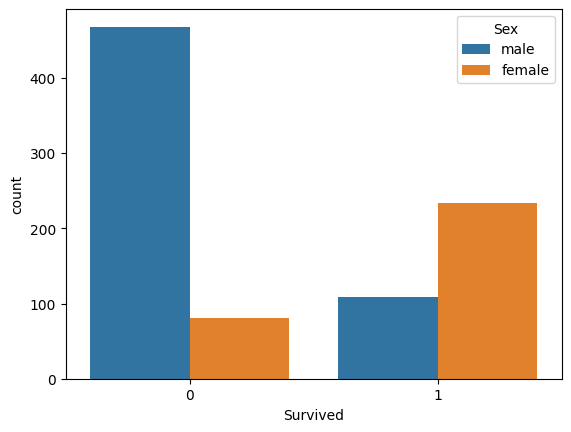

In [6]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

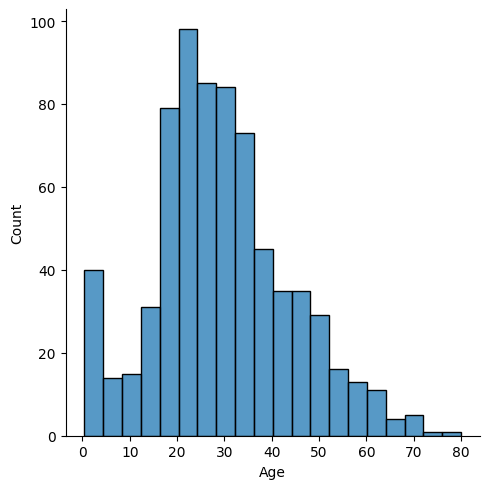

In [8]:
sb.displot(x="Age", data=datos)

In [9]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Calculo de la media de edad de los pasajeros

In [10]:
datos["Age"].mean()

29.69911764705882

In [11]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Limpieza de datos vacios dentro de la columna "Edad"

In [12]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
datos = datos.drop(["Cabin"], axis=1)

In [16]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
datos = datos.dropna()

In [18]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [20]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [21]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

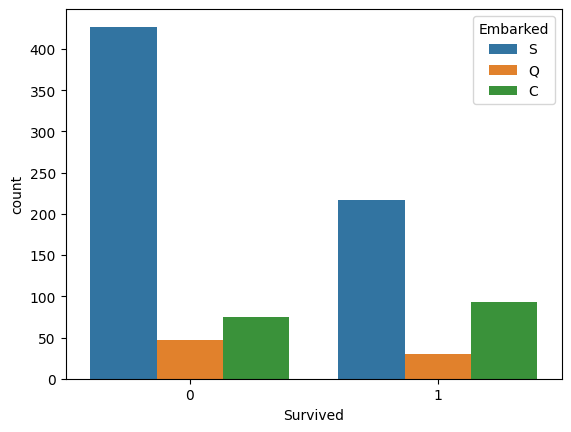

In [22]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [23]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [24]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

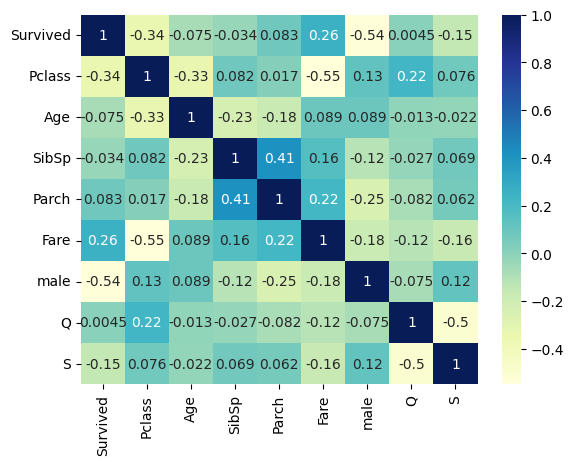

In [25]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

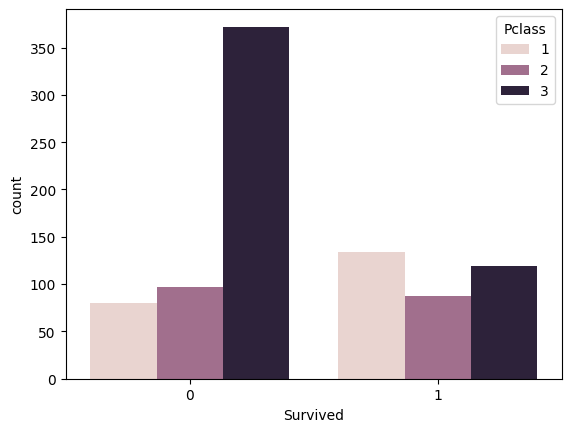

In [26]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [27]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

Separacion de los datos en Entrenamiento y Prueba

In [28]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

Importacion del modelo y entrenamiento del mismo

In [29]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8539325842696629

In [31]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.8033707865168539
Resultado para 2: 0.797752808988764
Resultado para 3: 0.8146067415730337
Resultado para 4: 0.8202247191011236
Resultado para 5: 0.8370786516853933
Resultado para 6: 0.8370786516853933
Resultado para 7: 0.8370786516853933
Resultado para 8: 0.848314606741573
Resultado para 9: 0.8426966292134831
Resultado para 10: 0.848314606741573
Resultado para 11: 0.8202247191011236
Resultado para 12: 0.848314606741573
Resultado para 13: 0.8258426966292135
Resultado para 14: 0.8146067415730337


<Axes: >

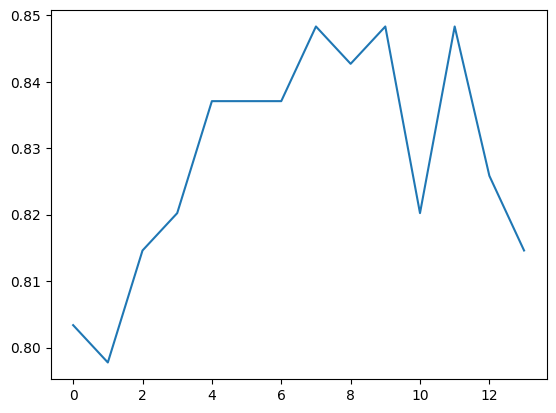

In [32]:
sb.lineplot(data=resultados)

In [33]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       114
           1       0.82      0.73      0.78        64

    accuracy                           0.85       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



Importacion de la matriz de confusion del modelo , para verificar si las predicciones son correctas

In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,104,10
Real: Si,17,47


In [36]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

Ploteo de todas las decisiones que puede tomar el modelo

[Text(0.47161091549295775, 0.9444444444444444, 'male <= 0.5\n0.475\n711\n[435, 276]\nMurió'),
 Text(0.2746478873239437, 0.8333333333333334, 'Pclass <= 2.5\n0.384\n251\n[65, 186]\nVivió'),
 Text(0.08098591549295775, 0.7222222222222222, 'Age <= 3.0\n0.087\n132\n[6, 126]\nVivió'),
 Text(0.028169014084507043, 0.6111111111111112, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.014084507042253521, 0.5, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.04225352112676056, 0.5, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.13380281690140844, 0.6111111111111112, 'Fare <= 13.25\n0.074\n130\n[5, 125]\nVivió'),
 Text(0.07042253521126761, 0.5, 'Age <= 53.5\n0.219\n24\n[3, 21]\nVivió'),
 Text(0.056338028169014086, 0.3888888888888889, 'Fare <= 12.825\n0.159\n23\n[2, 21]\nVivió'),
 Text(0.04225352112676056, 0.2777777777777778, '0.0\n10\n[0, 10]\nVivió'),
 Text(0.07042253521126761, 0.2777777777777778, 'Age <= 26.0\n0.26\n13\n[2, 11]\nVivió'),
 Text(0.04225352112676056, 0.16666666666666666, 'Age <= 21.0\n0.444\n3\n[1, 2]\nVivió'),

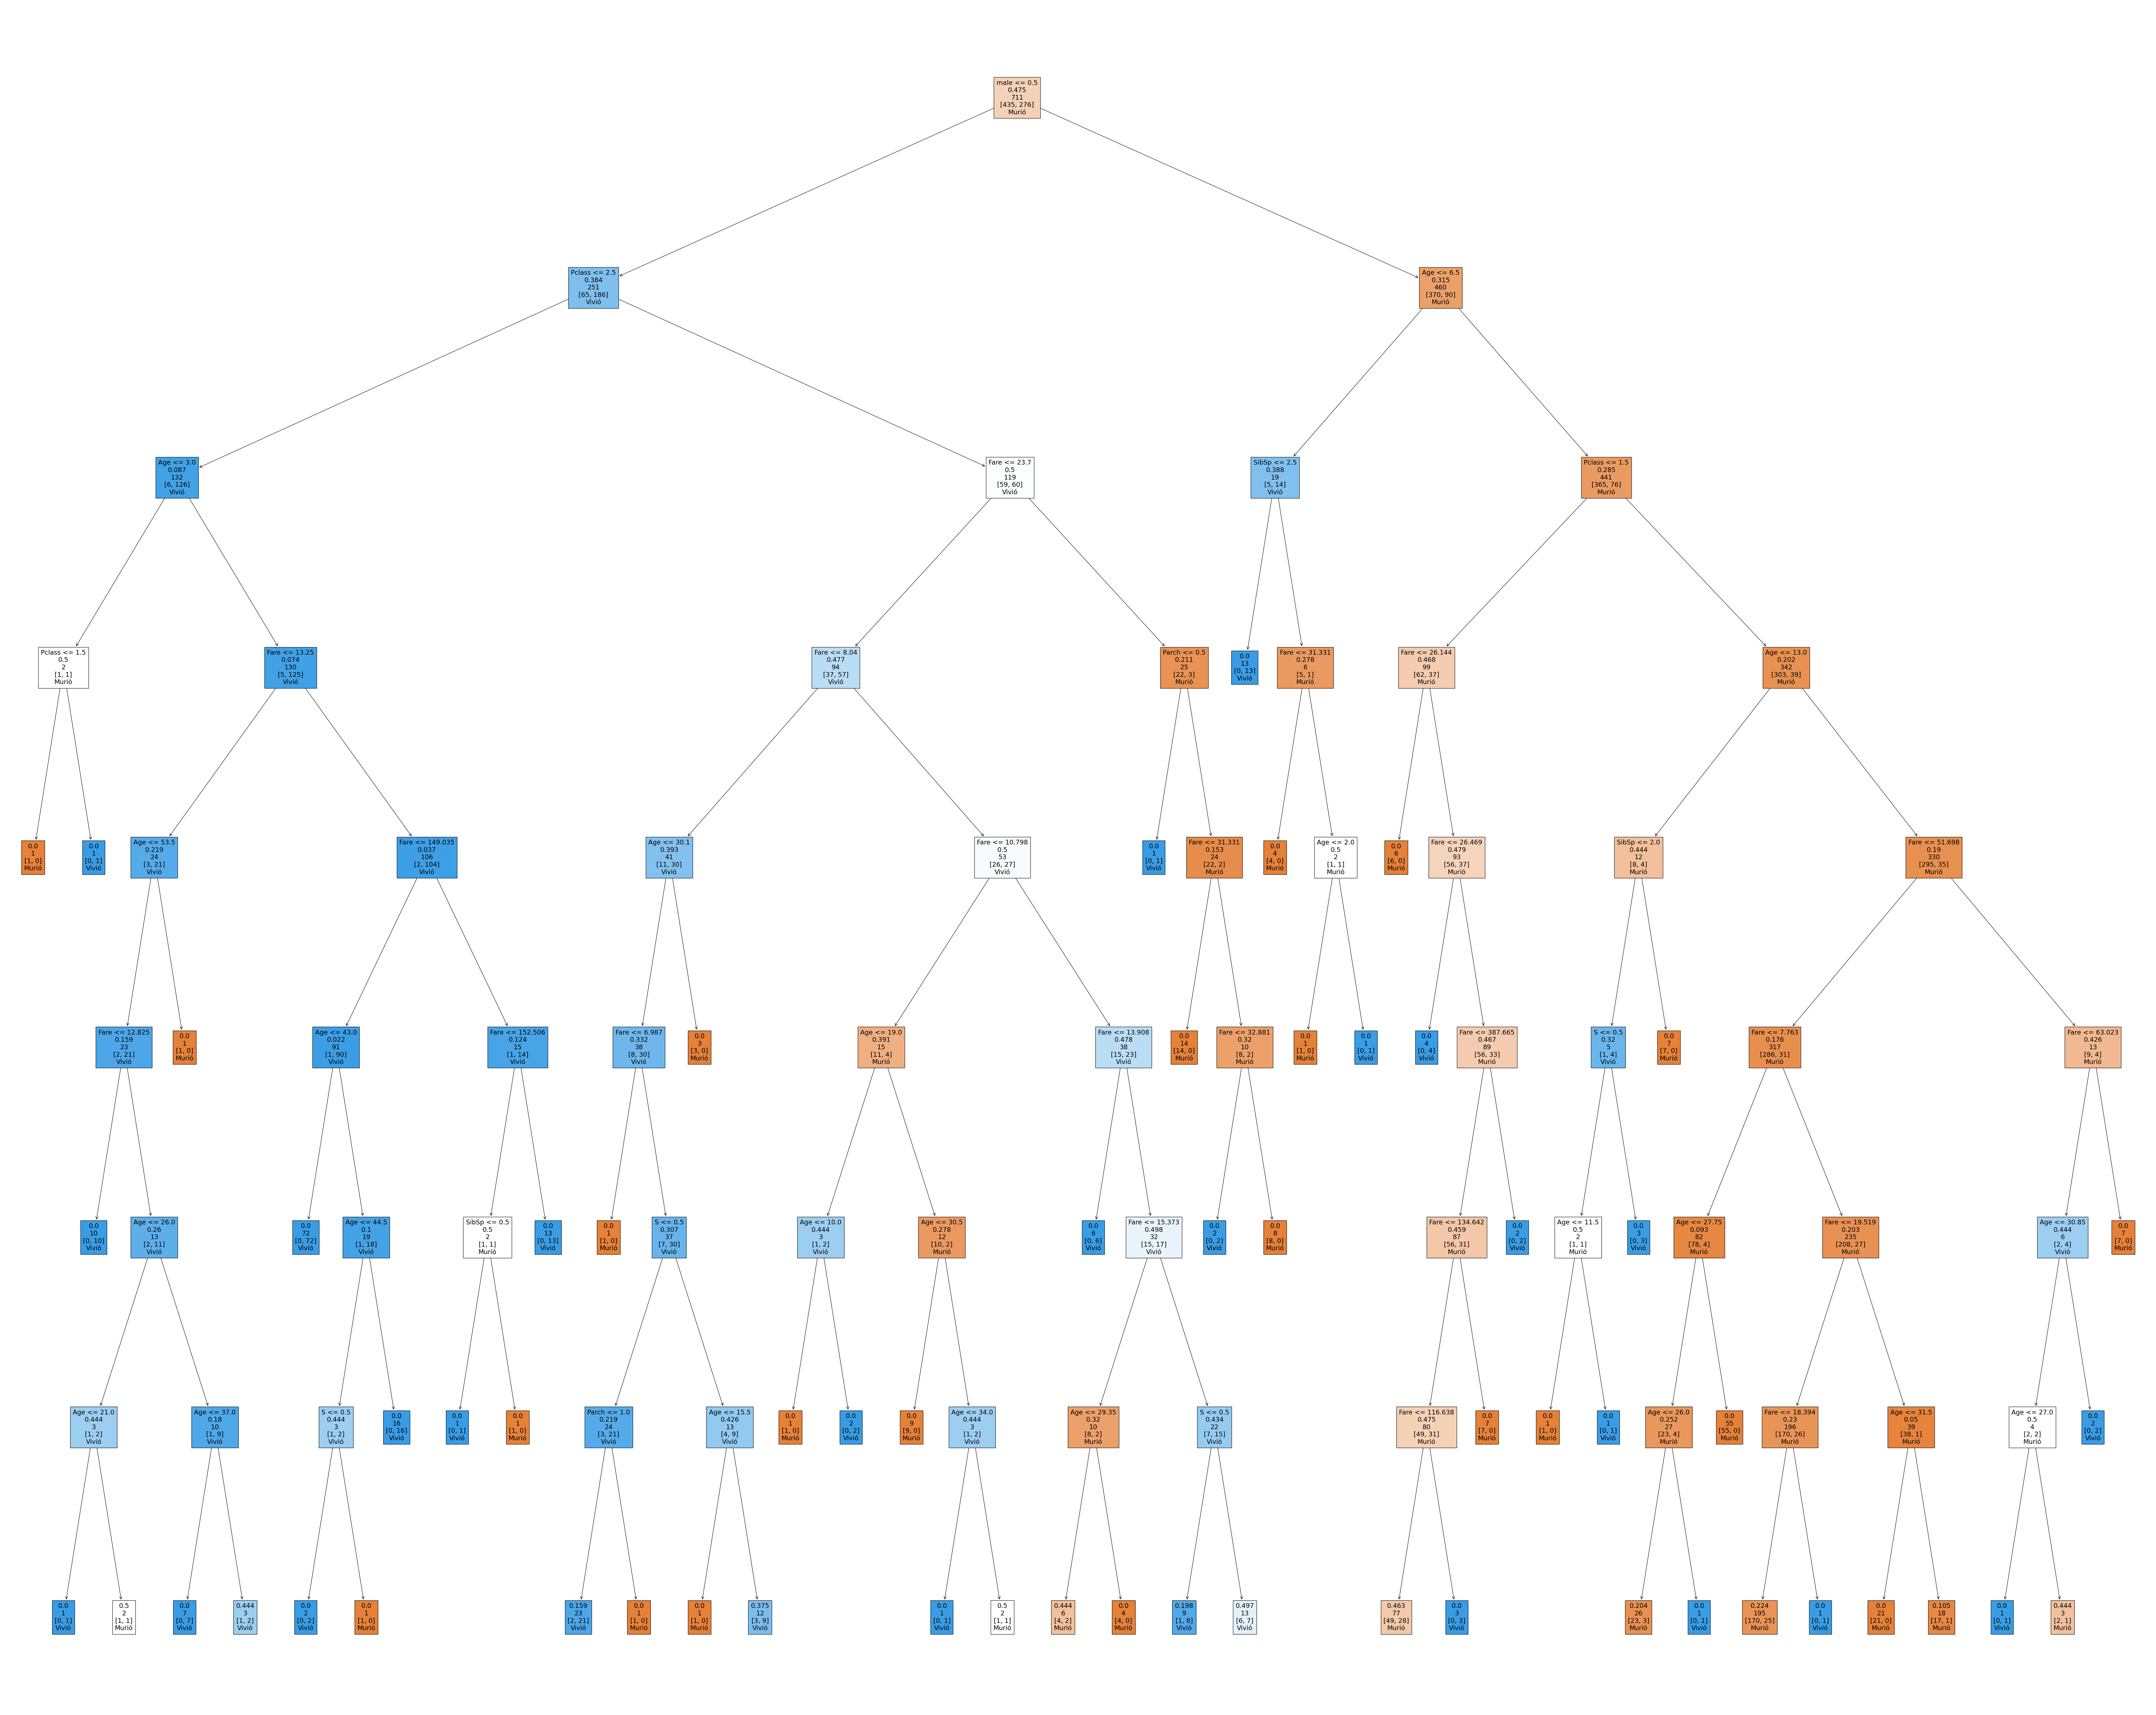

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

Mostrando Precision del Modelo -> el cual indica una precicion del 84%

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.848314606741573

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       114
           1       0.82      0.73      0.78        64

    accuracy                           0.85       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[104,  10],
       [ 17,  47]])

In [41]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,104,10
Real: Si,17,47


In [42]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


Realizando Prediccion sobre una nueva Persona que se Embarque en el Titanic

In [44]:
nueva_persona = [2, 45, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Felicidades Sobreviviste!")
else:
  print("No sobreviviste")

Felicidades Sobreviviste!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
